## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/sreekeshiyer/dmbi_aids_datasets/main/BostonHousingData.csv')
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Handling Missing Values

In [6]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df["CRIM"].fillna(df["CRIM"].mean(),inplace=True)
df["ZN"].fillna(df["ZN"].mean(),inplace=True)
df["INDUS"].fillna(df["INDUS"].mean(),inplace=True)
df["CHAS"].fillna(df["CHAS"].mean(),inplace=True)
df["AGE"].fillna(df["AGE"].mean(),inplace=True)
df["LSTAT"].fillna(df["LSTAT"].mean(),inplace=True)

In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Correlation Analysis

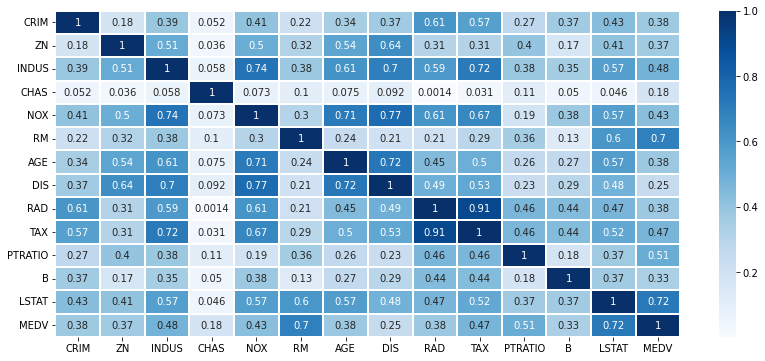

In [9]:
plt.figure(figsize=(14,6))
corr=abs(df.corr())
sns.heatmap(corr,annot=True,linewidth=1,cmap="Blues")
plt.show()

## Train-Test Split

In [10]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

## Regression model using inbuilt library function

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [13]:
lr.fit(X_train[["RM","LSTAT"]], y_train)

LinearRegression()

In [14]:
y_predicted = lr.predict(X_test[["RM","LSTAT"]])

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

print("R square value : ",r2_score(y_test, y_predicted))
print("MSE value : ",mean_squared_error(y_test, y_predicted))

R square value :  0.6804441130852339
MSE value :  29.288730915533865


## Regression model using user-defined function

In [16]:
from itertools import zip_longest
from sklearn.metrics import mean_squared_error, r2_score
class CustomLinearRegression():

  def __init__(self, X1, X2, Y, N):
    self.X1 = X1
    self.X2 = X2
    self.Y = Y
    self.N = N
    self.a = 0
    self.b1 = 0
    self.b2 = 0

  def fit(self):
    sum_X1 = np.sum(self.X1)
    sum_X2 = np.sum(self.X2)
    sum_Y = np.sum(self.Y)
    X1_Mean = np.mean(self.X1)
    X2_Mean = np.mean(self.X2)
    Y_Mean = np.mean(self.Y)

    sum_X1_sq = np.sum(self.X1 ** 2)
    sum_X2_sq = np.sum(self.X2 ** 2)

    sum_X1_Y = np.sum(self.X1 * self.Y)
    sum_X2_Y = np.sum(self.X2 * self.Y)
    sum_X1_X2 = np.sum(self.X1 * self.X2)

    x12 = sum_X1_sq - ((sum_X1 ** 2)/self.N)
    x22 = sum_X2_sq - ((sum_X2 ** 2)/self.N)

    x1y = sum_X1_Y - ((sum_X1 * sum_Y)/self.N)
    x2y = sum_X2_Y - ((sum_X2 * sum_Y)/self.N)
    x1x2 = sum_X1_X2 - ((sum_X1 * sum_X2)/self.N)


    self.b1 =  ((x22 * x1y) - (x1x2*x2y)) / ((x12*x22) - (x1x2 ** 2))
    self.b2 =  ((x12 * x2y) - (x1x2*x1y)) / ((x12*x22) - (x1x2 ** 2))
    self.a = Y_Mean - self.b1* X1_Mean - self.b2* X2_Mean

  def print_equation(self):
    if self.a !=0 and self.b1 != 0 and self.b2 != 0:
      print(f"y = {self.a} + {self.b1}x1 + {self.b2}x2")
    else:
      print("You need to use fit method first.")

  def predict(self, x1_test, x2_test):

    y_pred = [self.a + self.b1*x1 + self.b2*x2 for x1,x2 in zip_longest(x1_test, x2_test)]
    return y_pred

  def show_metrics(self, y_test, y_pred):
    print("R square value : ",r2_score(y_test, y_pred))
    print("MSE value : ",mean_squared_error(y_test, y_pred))

In [19]:
X1 = X_train["RM"]
X2 = X_train["LSTAT"]
Y = y_train
lin_reg = CustomLinearRegression(X1, X2, Y, N=len(Y))

lin_reg.fit()
lin_reg.print_equation()

y = 2.920993587665519 + 4.46903585639577x1 + -0.6546089737745551x2


In [26]:
x1_test = X_test["RM"]
x2_test = X_test["LSTAT"]
final_y_predicted = lin_reg.predict(x1_test, x2_test)

In [21]:
lin_reg.show_metrics(y_test, final_y_predicted)

R square value :  0.6804441130852366
MSE value :  29.28873091553362


## Visualization

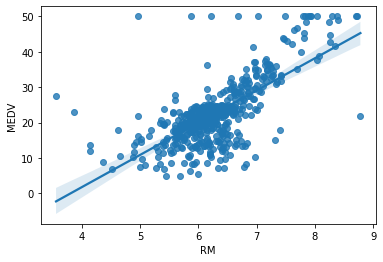

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x="RM", y="MEDV", data=df)

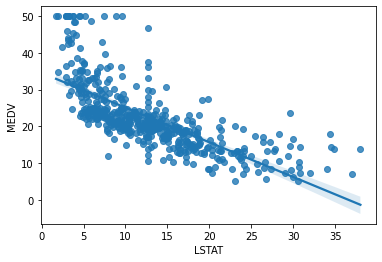

In [23]:
sns.regplot(x="LSTAT", y="MEDV", data=df)

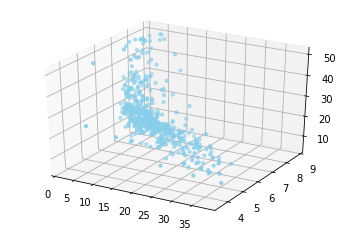

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['LSTAT'], df['RM'], df['MEDV'], c='skyblue', s=10)
plt.show()